# flatten 4d (lat, lon, date, level) output data to 2d (record, level)

In [27]:
import numpy as np
import xarray as xr
import re

In [28]:
# Name of input Netcdf file
input_directory = '/geos/u73/msadiq/GEOS-Chem/analysis/python/data/'
output_file_name = '2d_ts_satellite.201801-03.nc'
oco2_file_name = '2d_OCO2_extract.nc'
output_directory = input_directory

# Name of output netCDF file
# output_file = output_directory + '2d_' + name_nc_in

In [33]:
ds_satellite = xr.open_dataset(input_directory + oco2_file_name)
ds_satellite

<xarray.Dataset>
Dimensions:                (levels: 20, record: 406224)
Coordinates:
  * record                 (record) int64 0 1 2 3 ... 406221 406222 406223
  * levels                 (levels) float32 1e-04 0.05263158 ... 0.94736844 1.0
Data variables:
    xco2                   (record) float32 ...
    lat                    (record) float64 ...
    lon                    (record) float64 ...
    date                   (record) datetime64[ns] ...
    xco2_averaging_kernel  (record, levels) float32 ...
    psurf                  (record) float32 ...
    pressure               (record, levels) float32 ...
Attributes:
    comment:  flattened from 4d NetCDF file, after extracted from OCO2

In [34]:
ds_model = xr.open_dataset(input_directory + output_file_name)
ds_model
#ds['xco2_averaging_kernel'].isel(levels=19,time=0).plot()

<xarray.Dataset>
Dimensions:               (levels: 47, record: 406224)
Coordinates:
  * record                (record) int64 0 1 2 3 ... 406220 406221 406222 406223
  * levels                (levels) float64 0.9925 0.9775 ... 0.000127 2.763e-05
Data variables:
    SpeciesConc_CO2       (record, levels) float32 ...
    lat                   (record) float64 ...
    lon                   (record) float64 ...
    date                  (record) datetime64[ns] ...
    SpeciesConc_CO2oc     (record, levels) float32 ...
    SpeciesConc_CO2bf     (record, levels) float32 ...
    SpeciesConc_CO2ff     (record, levels) float32 ...
    SpeciesConc_CO2Tag1   (record, levels) float32 ...
    SpeciesConc_CO2Tag2   (record, levels) float32 ...
    SpeciesConc_CO2Tag3   (record, levels) float32 ...
    SpeciesConc_CO2Tag4   (record, levels) float32 ...
    SpeciesConc_CO2Tag5   (record, levels) float32 ...
    SpeciesConc_CO2Tag6   (record, levels) float32 ...
    SpeciesConc_CO2Tag7   (record, levels) float32 ...
    SpeciesConc_CO2Tag8   (record, levels) float32 ...
    SpeciesConc_CO2Tag9   (record, levels) float32 ...
    SpeciesConc_CO2Tag10  (record, levels) float32 ...
    SpeciesConc_CO2Tag11  (record, levels) float32 ...
    SpeciesConc_CO2Tag12  (record, levels) float32 ...
    SpeciesConc_CO2Tag13  (record, levels) float32 ...
    SpeciesConc_CO2Tag14  (record, levels) float32 ...
    SpeciesConc_CO2Tag15  (record, levels) float32 ...
    SpeciesConc_CO2Tag16  (record, levels) float32 ...
    SpeciesConc_CO2Tag17  (record, levels) float32 ...
    SpeciesConc_CO2Tag18  (record, levels) float32 ...
    SpeciesConc_CO2Tag19  (record, levels) float32 ...
    SpeciesConc_CO2Tag20  (record, levels) float32 ...
    SpeciesConc_CO2Tag21  (record, levels) float32 ...
    SpeciesConc_CO2Tag22  (record, levels) float32 ...
    PEDGE_S_PSURF         (record, levels) float32 ...
Attributes:
    comment:  [CO2] unit: ppbv

<xarray.Dataset>
Dimensions:                (levels: 20, record: 406224)
Coordinates:
  * record                 (record) int64 0 1 2 3 ... 406221 406222 406223
  * levels                 (levels) float32 1e-04 0.05263158 ... 0.94736844 1.0
Data variables:
    xco2                   (record) float32 ...
    lat                    (record) float64 ...
    lon                    (record) float64 ...
    date                   (record) datetime64[ns] ...
    xco2_averaging_kernel  (record, levels) float32 ...
    psurf                  (record) float32 ...
    pressure               (record, levels) float32 ...
Attributes:
    comment:  flattened from 4d NetCDF file, after extracted from OCO2

In [33]:
varnames = list(ds.data_vars.keys())  # Get a list of variable names. The expression is a bit cumbersome. Just copy and paste it for now.
nvar = len(varnames)  # how many elements in the list?
varnames

['xco2_averaging_kernel', 'xco2', 'psurf']

In [34]:
nm_lev = len(ds.coords['lev'])
nm_lon = len(ds.coords['lon'])
nm_lat = len(ds.coords['lat'])
nm_days = len(ds.coords['date'])

record = range(nm_lon * nm_lat * nm_days)
record

range(0, 406224)

In [35]:
# 2d data array to store flattened data
foo_2d = xr.DataArray(data = 0,
                      dims=('record', 'levels'),
                      coords=[record, ds.coords['lev']])
foo_2d = foo_2d.astype(dtype = 'float32')
# 1d data array to store flattened data
foo_1d = xr.DataArray(data = 0,
                      dims=('record'),
                      coords={record})
foo_1d = foo_1d.astype(dtype = 'float32')

# dataset to store following dataarrays
ds_output = foo_2d.to_dataset(name = 'xco2')
ds_output = ds_output.astype(dtype = 'float32')

In [36]:
flat = ds['xco2_averaging_kernel'][:,0,:,:].to_dataframe()
# flatten a variable at one level
flat.reset_index(inplace=True) 
# get indices from this to prepare output coordinates

In [37]:
flat

,date,lat,lon,lev,xco2_averaging_kernel
0,2018-03-01,-90.0,-180.0,0.0001,0.0
1,2018-03-01,-90.0,-177.5,0.0001,0.0
2,2018-03-01,-90.0,-175.0,0.0001,0.0
3,2018-03-01,-90.0,-172.5,0.0001,0.0
4,2018-03-01,-90.0,-170.0,0.0001,0.0
...,...,...,...,...,...
406219,2018-03-31,90.0,167.5,0.0001,0.0
406220,2018-03-31,90.0,170.0,0.0001,0.0
406221,2018-03-31,90.0,172.5,0.0001,0.0
406222,2018-03-31,90.0,175.0,0.0001,0.0


In [38]:
lat = xr.DataArray(0, coords=[record], dims=['record'])
lon = xr.DataArray(0, coords=[record], dims=['record'])
date = xr.DataArray(0, coords=[record], dims=['record'])
lat.values = flat['lat']
lon.values = flat['lon']
date.values = flat['date']
ds_output['lat'] = lat
ds_output['lon'] = lon
ds_output['date'] = date
ds_output

<xarray.Dataset>
Dimensions:  (levels: 20, record: 406224)
Coordinates:
  * record   (record) int64 0 1 2 3 4 5 ... 406219 406220 406221 406222 406223
  * levels   (levels) float32 1e-04 0.05263158 0.10526316 ... 0.94736844 1.0
Data variables:
    xco2     (record, levels) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lat      (record) float64 -90.0 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0 90.0
    lon      (record) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    date     (record) datetime64[ns] 2018-03-01 2018-03-01 ... 2018-03-31

In [39]:
for ivar in varnames:
    print(ivar)
    
    if len(ds[ivar].dims) == 4:
        for ilev in range(nm_lev):
            flat = ds[ivar][:,ilev,:,:].to_dataframe() # flatten a variable at one level
            foo_2d[:,ilev] = flat[ivar].values # store output to a dataarray
        ds_output[ivar] = foo_2d.copy() # store dataarray to dataset
    
    else:
        flat = ds[ivar].to_dataframe()
        foo_1d.values = flat[ivar].values
        ds_output[ivar] = foo_1d.copy() # store dataarray to dataset

xco2_averaging_kernel
xco2
psurf


In [40]:
# pressure profile
pressure = ds_output.psurf * ds_output.coords['levels']
ds_output['pressure'] = pressure
ds_output

<xarray.Dataset>
Dimensions:                (levels: 20, record: 406224)
Coordinates:
  * record                 (record) int64 0 1 2 3 ... 406221 406222 406223
  * levels                 (levels) float32 1e-04 0.05263158 ... 0.94736844 1.0
Data variables:
    xco2                   (record) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lat                    (record) float64 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0
    lon                    (record) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
    date                   (record) datetime64[ns] 2018-03-01 ... 2018-03-31
    xco2_averaging_kernel  (record, levels) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psurf                  (record) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    pressure               (record, levels) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [41]:
ds_output.attrs['comment'] = 'flattened from 4d NetCDF file, after extracted from OCO2'

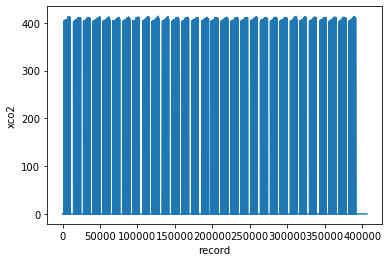

In [42]:
ds_output.xco2.plot()

In [43]:
ds_output.to_netcdf(path=output_file)